### How to Access MERRA-2 Data using OPeNDAP with Python3 and Calculate Daily/Weekly/Monthly Statistics from Hourly Data 

* This instruction is based on Python3 and demonstrates how to remotely access the Modern-Era Retrospective analysis for Research and Applications, Version 2 (MERRA-2) hourly files via OPeNDAP and analyze data such as resample hourly files into daily, weekly, and monthly files and calculate their corresponding statistics, e.g., mean, sum, maximum, and minimum. 

**Contact**: 
* gsfc-dl-help-disc@mail.nasa.gov
* Last update: Sep. 20, 2021

This Python3 example code demonstrates how to remotely access a dataset archived in GES DISC using the Open-source Project for a Network Data Access Protocol (OPeNDAP) web service. We use the Modern-Era Retrospective analysis for Research and Applications, Version 2 (MERRA-2) aerosol diagnostics collection M2T1NXAER.5.12.4 in this example. This collection is 1-hourly time-averaged single-level global aerosol assimilation and archived in daily files with 24 hourly time slices in each file (481 MB per file/day and 14.6 GB per month). For demonstration, we only read 12-day data (i.e., the first 12 days in January 2020)remotely through OPeNDAP URL. We also demonstrate how to calculate the daily/weekly/monthly statistics from hourly data and visualize the evolution of Australian bushfire in January 2020. Figures 1 and 2 are the example images generated by the Python code below, in which the total aerosol extinction (AOT) is plotted as an indicator of the aerosol loading in atmosphere. 

**Prerequisites** 

- This example code is written in Python3 (v3.9.2) Jupyter Notebook and requires these libraries: xarray (0.17.0), matplotlib.pyplot (3.4.1), cartopy.crs (0.18.0), calendar, time, platform (make sure all packages are up to date). In particular, here is the instruction on how to install [xarray](http://xarray.pydata.org/en/stable/getting-started-guide/installing.html) and [cartopy](https://scitools.org.uk/cartopy/docs/v0.15/installing.html). 
- You can execute this example code in your Jupyter Notebook. This code has been tested with Jupyter Notebook v6.2.0 and v6.3.0 in Mac OS, Jupyter Notebook v6.1.4 in Windows OS. Or you can just run it in your Python 3 enviroment. This code has been tested in Python 3 in Mac, window and Linux OS.

**Caveats**:

- Reading multiple hourly data files is a resource demanding task due to large data volume. It may take about 5 minutes to open one-month of the sample data (or longer if the data archive system is  currently heavily loaded). Be patient!
- Visualizing the figures may also take time (~4 minute)
- You may want to test first if your xarray package can read the data in your local disk before reading the data remotely as demonstrated in this case. 


**Reference**:
- [Time-series in xarray](http://xarray.pydata.org/en/stable/time-series.html) 
- [Statistical Operations, Resampling and Climatologies Using Xarray](https://nci-data-training.readthedocs.io/en/latest/_notebook/climate/1_07_Xarray_statistical_resample_roll_climatology_CMIP6.html)
- [Xarray plotting and visualization](https://xarray-contrib.github.io/xarray-tutorial/scipy-tutorial/04_plotting_and_visualization.html)

**Procedure**:
1. Register Earthdata account and set up the credential environment

2. Execute the Python code below in your Jupyter Notebook step-by-step
- 2.1 Import the required Python modules or libraries. If any of the following import commands fail, check the local Python environment and install any missing packages.

In [1]:
# ----------------------
# Import Python modules
# ----------------------
# import warnings
# warnings.filterwarnings("ignore")

import xarray as xr
import matplotlib.pyplot as plt
# import cartopy.crs as ccrs
# import netCDF4 as nc
# from os import listdir
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
from datetime import date
import scipy

# from calendar import monthrange
import time
import platform
print("platform.python_version() ", platform.python_version())

platform.python_version()  3.8.16


- 2.2 Remotely access the hourly MERRA-2 files through OPeNDAP URL (Please refer to "How to obtain the URL of OPeNDAP served dataset"). In this case below, we read the first 12 days in January 2020. Note that the collection number was changed to a new number if this collection was reprocessed, please refer to ["Records of MERRA-2 Data Reprocessing and Service Changes"](https://disc.gsfc.nasa.gov/information/documents?title=Records%20of%20MERRA-2%20Data%20Reprocessing%20and%20Service%20Changes). The line of "%%time" at the beginning of each cell is used for estimating the running time for that cell. 

In [2]:
%%time
# ---------------------------------
# Read data
# ---------------------------------
# MERRA-2 collection (hourly)
collection_shortname = 'M2IUNXASM' #'M2T1NXAER'
collection_longname  = 'instU_2d_asm_Nx' #'tavg1_2d_aer_Nx'
collection_number = 'MERRA2_400'  
MERRA2_version = '5.12.4'
year = 1994
    # https://goldsmr4.gesdisc.eosdis.nasa.gov/opendap/MERRA2_DIURNAL/M2IUNXASM.5.12.4/contents.html
# https://data.gesdisc.earthdata.nasa.gov/data/MERRA2_DIURNAL/M2IUNXASM.5.12.4/2023/MERRA2_400.instU_2d_asm_Nx.202305.nc4

# Open dataset
# Read selected days in the same month and year
month = 8  # January
    
# # Note that collection_number is MERRA2_401 in a few cases, refer to "Records of MERRA-2 Data Reprocessing and Service Changes"
if year < 2011:
    collection_number = 'MERRA2_300'
if year < 2001:
    collection_number = 'MERRA2_200'
if year < 1992:
    collection_number = 'MERRA2_100'

            
# OPeNDAP URL 
# collection_shortname = 'M2TMNXSLV'
# collection_longname  = 'tavgM_2d_slv_Nx'
url = 'https://goldsmr4.gesdisc.eosdis.nasa.gov/opendap/MERRA2_DIURNAL/{}.{}/{}'.format(collection_shortname, MERRA2_version, year)
# url = 'https://goldsmr4.gesdisc.eosdis.nasa.gov/opendap/MERRA2_MONTHLY/{}.{}/{}'.format(collection_shortname, MERRA2_version, year)
files_month = '{}/{}.{}.{}{:0>2d}.nc4'.format(url,collection_number, collection_longname, year, month)
# Get the number of files
# we can request specific fields, like wind speed in U-V direction.
# files_month = [files_month+'?lat,lon,time,U10M,V10M']
files_month = [files_month]
print(files_month)
# Print
len_files_month = len(files_month)
print("{} files to be opened:".format(len_files_month))
print("files", files_month)

print(" ")
print("Opening...(It may take ~ 5 minutes to open 1-month data)")
print(" ")

# https://goldsmr4.gesdisc.eosdis.nasa.gov/opendap/MERRA2_DIURNAL/M2IUNXASM.5.12.4/2020/MERRA2_400.instU_2d_asm_Nx.202001.nc4.html
    
# Read dataset URLs
ds = xr.open_mfdataset(files_month)
   
# View metadata (function like ncdump -c)
ds

['https://goldsmr4.gesdisc.eosdis.nasa.gov/opendap/MERRA2_DIURNAL/M2IUNXASM.5.12.4/1994/MERRA2_200.instU_2d_asm_Nx.199408.nc4']
1 files to be opened:
files ['https://goldsmr4.gesdisc.eosdis.nasa.gov/opendap/MERRA2_DIURNAL/M2IUNXASM.5.12.4/1994/MERRA2_200.instU_2d_asm_Nx.199408.nc4']
 
Opening...(It may take ~ 5 minutes to open 1-month data)
 
CPU times: user 216 ms, sys: 51.4 ms, total: 268 ms
Wall time: 5.33 s


<xarray.Dataset>
Dimensions:  (time: 24, lat: 361, lon: 576)
Coordinates:
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * time     (time) datetime64[ns] 1994-08-01 ... 1994-08-01T23:00:00
Data variables: (12/24)
    U2M      (time, lat, lon) float32 dask.array<chunksize=(24, 361, 576), meta=np.ndarray>
    TROPT    (time, lat, lon) float32 dask.array<chunksize=(24, 361, 576), meta=np.ndarray>
    TROPPB   (time, lat, lon) float32 dask.array<chunksize=(24, 361, 576), meta=np.ndarray>
    T2M      (time, lat, lon) float32 dask.array<chunksize=(24, 361, 576), meta=np.ndarray>
    TQL      (time, lat, lon) float32 dask.array<chunksize=(24, 361, 576), meta=np.ndarray>
    TOX      (time, lat, lon) float32 dask.array<chunksize=(24, 361, 576), meta=np.ndarray>
    ...       ...
    V10M     (time, lat, lon) float32 dask.array<chunksize=(24, 361, 576), meta=np.ndarray>
    U50M     (time, lat, lon) float32 dask.array<chunksize=(24, 361, 576), meta=np.ndarray>
    U10M     (time, lat, lon) float32 dask.array<chunksize=(24, 361, 576), meta=np.ndarray>
    QV2M     (time, lat, lon) float32 dask.array<chunksize=(24, 361, 576), meta=np.ndarray>
    TROPPV   (time, lat, lon) float32 dask.array<chunksize=(24, 361, 576), meta=np.ndarray>
    QV10M    (time, lat, lon) float32 dask.array<chunksize=(24, 361, 576), meta=np.ndarray>
Attributes: (12/31)
    History:                           Original file generated: Fri Jun 12 12...
    Filename:                          MERRA2_200.instU_2d_asm_Nx.199408.nc4
    Comment:                           GMAO filename: d5124_m2_jan91.inst1_2d...
    Conventions:                       CF-1
    Institution:                       NASA Global Modeling and Assimilation ...
    References:                        http://gmao.gsfc.nasa.gov
    ...                                ...
    Source:                            CVS tag: GEOSadas-5_12_4
    Contact:                           http://gmao.gsfc.nasa.gov
    identifier_product_doi:            10.5067/BOJSTZAO2L8R
    RangeBeginningTime:                00:00:00.000000
    RangeEndingTime:                   23:00:00.000000
    DODS_EXTRA.Unlimited_Dimension:    time

In [3]:
# get data
cur_time = date.fromisoformat(ds.RangeBeginningDate)
lat = ds['lat'][:]
lon = ds['lon'][:]
time = ds['time'][:]
print(time)
u = ds["U10M"][:]
v = ds["V10M"][:]
p = ds["SLP"][:]
# p = ds["PS"][:]
t = ds["T2M"][:]

print("size of 1 month of data: (bytes)", v.nbytes)
print("size of 40 years of data: (bytes)", 40*12*v.nbytes)

<xarray.DataArray 'time' (time: 24)>
array(['1994-08-01T00:00:00.000000000', '1994-08-01T01:00:00.000000000',
       '1994-08-01T02:00:00.000000000', '1994-08-01T03:00:00.000000000',
       '1994-08-01T04:00:00.000000000', '1994-08-01T05:00:00.000000000',
       '1994-08-01T06:00:00.000000000', '1994-08-01T07:00:00.000000000',
       '1994-08-01T08:00:00.000000000', '1994-08-01T09:00:00.000000000',
       '1994-08-01T10:00:00.000000000', '1994-08-01T11:00:00.000000000',
       '1994-08-01T12:00:00.000000000', '1994-08-01T13:00:00.000000000',
       '1994-08-01T14:00:00.000000000', '1994-08-01T15:00:00.000000000',
       '1994-08-01T16:00:00.000000000', '1994-08-01T17:00:00.000000000',
       '1994-08-01T18:00:00.000000000', '1994-08-01T19:00:00.000000000',
       '1994-08-01T20:00:00.000000000', '1994-08-01T21:00:00.000000000',
       '1994-08-01T22:00:00.000000000', '1994-08-01T23:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1994-08-

In [6]:
date.fromisoformat(ds.RangeBeginningDate)

datetime.date(1994, 8, 1)

In [17]:
import datetime

da = datetime.datetime(2020, 1, 1)
da.strftime("%B"), cur_time.strftime("%Y")

('January', '1994')

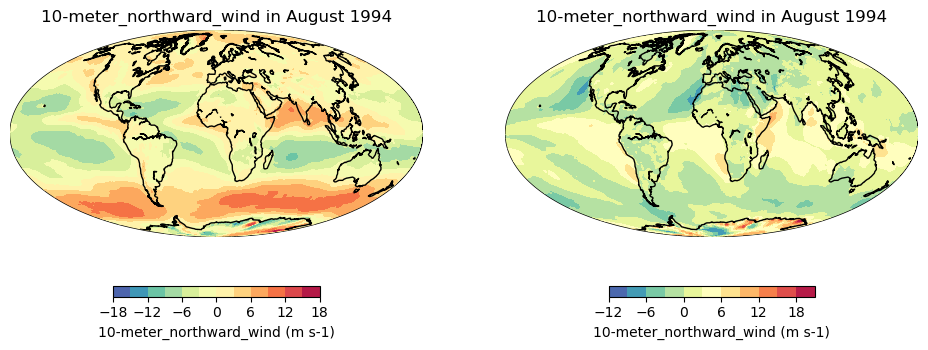

In [4]:
# plot
def cm(x, y) : return (x/2.56, y/2.56)
fig = plt.figure(figsize=cm(30,11))

# add map with coastlines
ax = fig.add_subplot(121)
m = Basemap(projection='moll', llcrnrlat=-90, urcrnrlat=90,\
            llcrnrlon=0, urcrnrlon=360, resolution='c', lon_0=0)
m.drawcoastlines()
# m.drawmapboundary()

# Transforms lat/lon into plotting coordinates for projection
lon2d, lat2d = np.meshgrid(lon, lat)
x, y = m(lon2d, lat2d)

# Plot of air temperature with 11 contour intervals
cs = m.contourf(x, y, u.mean(dim='time'), 11, cmap=plt.cm.Spectral_r)

cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5)
cbar.set_label("%s (%s)" % (v.long_name, v.units))
plt.title("%s in %s %s" %  (v.long_name, cur_time.strftime("%B"), cur_time.strftime("%Y")))

# add map with coastlines
ax = fig.add_subplot(122)
m = Basemap(projection='moll', llcrnrlat=-90, urcrnrlat=90,\
            llcrnrlon=0, urcrnrlon=360, resolution='c', lon_0=0)
m.drawcoastlines()
# m.drawmapboundary()

# Transforms lat/lon into plotting coordinates for projection
lon2d, lat2d = np.meshgrid(lon, lat)
x, y = m(lon2d, lat2d)

# Plot of air temperature with 11 contour intervals
cs = m.contourf(x, y, v.mean(dim='time'), 11, cmap=plt.cm.Spectral_r)

cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5)
cbar.set_label("%s (%s)" % (v.long_name, v.units))
plt.title("%s in %s %s" %  (v.long_name, cur_time.strftime("%B"), cur_time.strftime("%Y")))
plt.savefig("merra2.png", dpi=300)
plt.show()

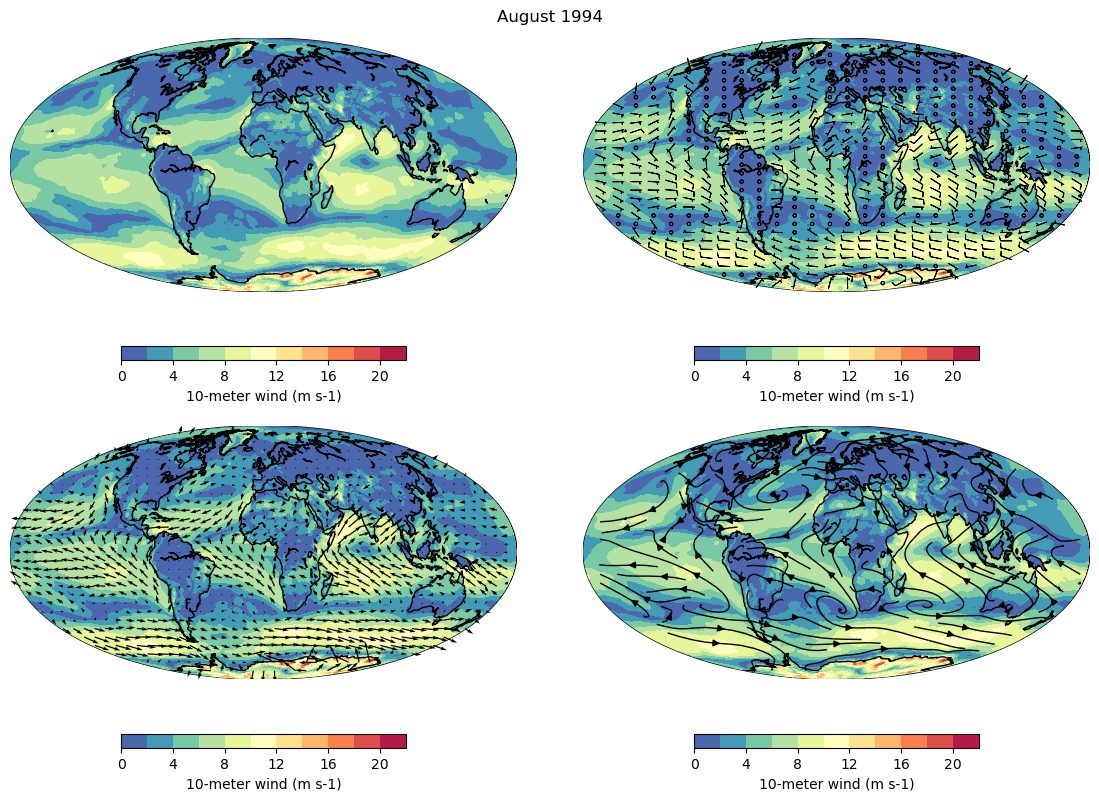

In [8]:
fig = plt.figure(figsize=cm(30,21))

# add map with coastlines
ax = fig.add_subplot(221)
m = Basemap(projection='moll', llcrnrlat=-90, urcrnrlat=90,\
            llcrnrlon=0, urcrnrlon=360, resolution='c', lon_0=0)
m.drawcoastlines()

# Transforms lat/lon into plotting coordinates for projection
lon2d, lat2d = np.meshgrid(lon, lat)
x, y = m(lon2d, lat2d)

# equi-spaced data
lonnew, latnew, xnew, ynew = m.makegrid(v.shape[2], v.shape[1], returnxy=True)
unew = scipy.interpolate.griddata((x.flatten(),y.flatten()),u.mean(dim="time").data.flatten(), (xnew, ynew) ,method='linear')
vnew = scipy.interpolate.griddata((x.flatten(),y.flatten()),v.mean(dim="time").data.flatten(), (xnew, ynew) ,method='linear')

# Plot of air temperature with 11 contour intervals
cs = m.contourf(x, y, np.sqrt(u.mean(dim='time')**2+v.mean(dim='time')**2), 11, cmap=plt.cm.Spectral_r)

cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5)
cbar.set_label("10-meter wind (%s)" % (v.units))
fig.suptitle("%s %s" %  (cur_time.strftime("%B"), cur_time.strftime("%Y")))


ax = fig.add_subplot(222)
m.drawcoastlines()
# Plot of air temperature with 11 contour intervals
cs = m.contourf(x, y, np.sqrt(u.mean(dim='time')**2+v.mean(dim='time')**2), 11, cmap=plt.cm.Spectral_r)

cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5)
cbar.set_label("10-meter wind (%s)" % (v.units))
ax.barbs(xnew[::12,::20], ynew[::12,::20], unew[::12,::20], vnew[::12,::20], length=4, pivot='middle', linewidth=0.7, color='k')


ax = fig.add_subplot(223)
m.drawcoastlines()
# Plot of air temperature with 11 contour intervals
cs = m.contourf(x, y, np.sqrt(u.mean(dim='time')**2+v.mean(dim='time')**2), 11, cmap=plt.cm.Spectral_r)

cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5)
cbar.set_label("10-meter wind (%s)" % (v.units))
ax.quiver(xnew[::12,::12], ynew[::12,::12], unew[::12,::12], vnew[::12,::12],color='k')


ax = fig.add_subplot(224)
m.drawcoastlines()
# Plot of air temperature with 11 contour intervals
cs = m.contourf(x, y, np.sqrt(u.mean(dim='time')**2+v.mean(dim='time')**2), 11, cmap=plt.cm.Spectral_r)

cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5)
cbar.set_label("10-meter wind (%s)" % (v.units))
ax.streamplot(xnew[::12,::12], ynew[::12,::12], unew[::12,::12], vnew[::12,::12], color='k', linewidth=1.0)

# add map with coastlines
plt.tight_layout()
plt.savefig("merra.png", dpi=600)
plt.show()

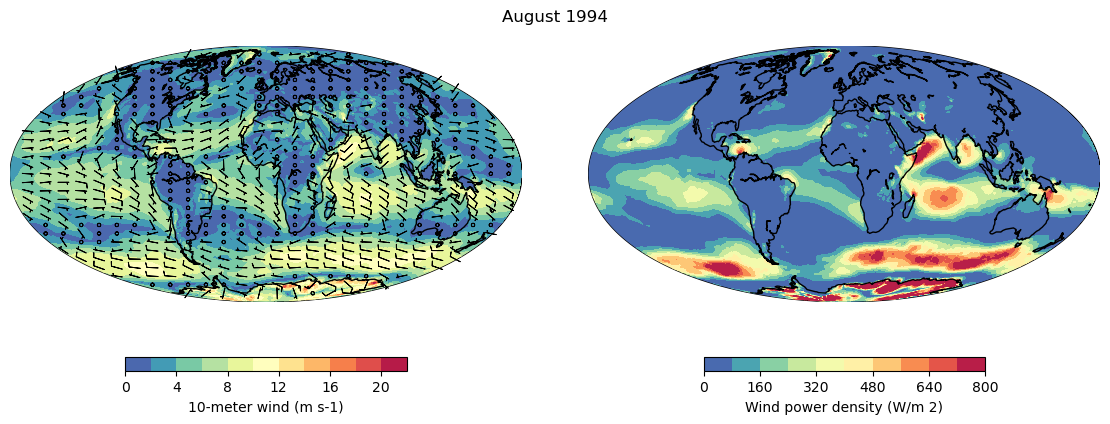

In [73]:
fig = plt.figure(figsize=cm(30,11))

# add map with coastlines
ax = fig.add_subplot(121)
m = Basemap(projection='moll', llcrnrlat=-90, urcrnrlat=90,\
            llcrnrlon=0, urcrnrlon=360, resolution='c', lon_0=0)
m.drawcoastlines()

# Transforms lat/lon into plotting coordinates for projection
lon2d, lat2d = np.meshgrid(lon, lat)
x, y = m(lon2d, lat2d)

# equi-spaced data
lonnew, latnew, xnew, ynew = m.makegrid(v.shape[2], v.shape[1], returnxy=True)
unew = scipy.interpolate.griddata((x.flatten(),y.flatten()),u.mean(dim="time").data.flatten(), (xnew, ynew) ,method='linear')
vnew = scipy.interpolate.griddata((x.flatten(),y.flatten()),v.mean(dim="time").data.flatten(), (xnew, ynew) ,method='linear')

# Plot of air temperature with 11 contour intervals
cs = m.contourf(x, y, np.sqrt(u.mean(dim='time')**2+v.mean(dim='time')**2), 11, cmap=plt.cm.Spectral_r)
ax.barbs(xnew[::12,::20], ynew[::12,::20], unew[::12,::20], vnew[::12,::20], length=4, pivot='middle', linewidth=0.7, color='k')
cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5)
cbar.set_label("10-meter wind (%s)" % (v.units))
fig.suptitle("%s %s" %  (cur_time.strftime("%B"), cur_time.strftime("%Y")))

ax = fig.add_subplot(122)
m.drawcoastlines()
# Plot of air temperature with 11 contour intervals
speed = np.sqrt(u**2 + v**2)
k = (speed.mean(dim="time")/speed.std(dim='time'))**1.086
c = speed.mean(dim="time")/ scipy.special.gamma(1.+1./k)
E = 0.5*1.23*scipy.special.gamma(1.+3./k)*c**3


# ax.streamplot(xnew[::12,::12], ynew[::12,::12], unew[::12,::12], vnew[::12,::12], color='k', linewidth=1.0)
cs = m.contourf(x, y, E.clip(0,800), np.linspace(0,800,11), cmap=plt.cm.Spectral_r)
cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5)
cbar.set_label("Wind power density (W/m 2)")

# add map with coastlines
plt.tight_layout()
plt.savefig("merra_dist.png", dpi=1200)
plt.show()

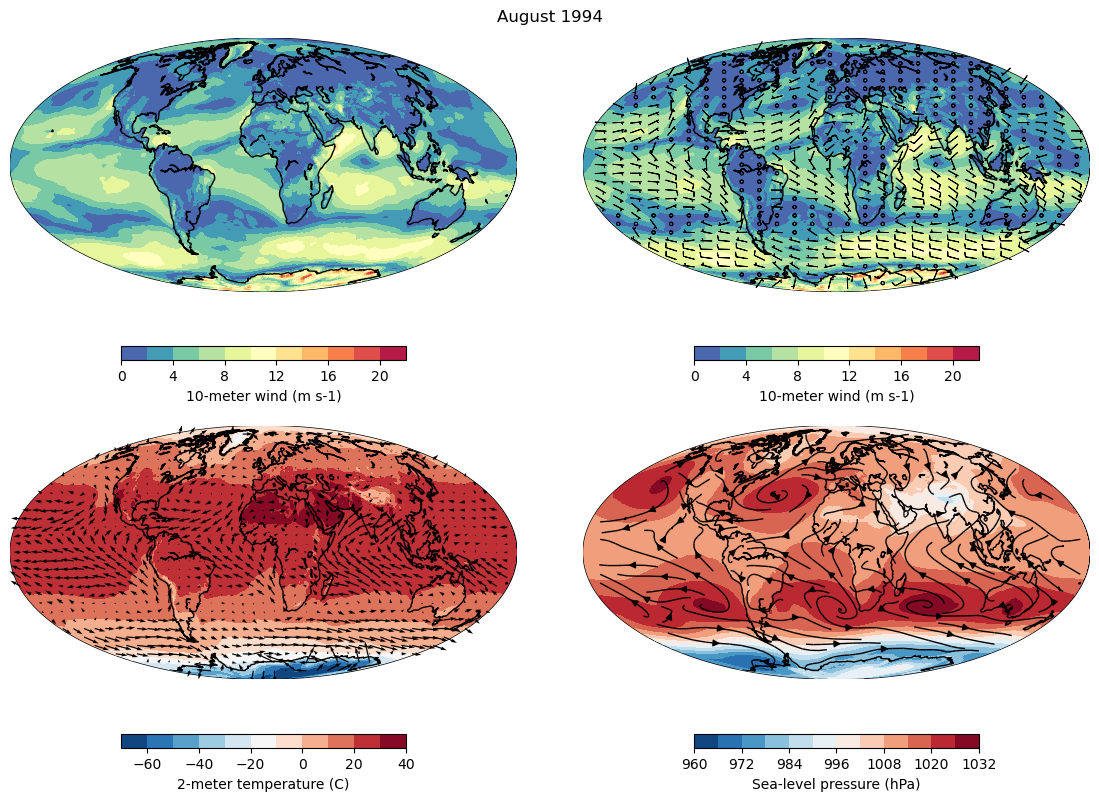

In [7]:
fig = plt.figure(figsize=cm(30,21))

# add map with coastlines
ax = fig.add_subplot(221)
m = Basemap(projection='moll', llcrnrlat=-90, urcrnrlat=90,\
            llcrnrlon=0, urcrnrlon=360, resolution='c', lon_0=0)
m.drawcoastlines()

# Transforms lat/lon into plotting coordinates for projection
lon2d, lat2d = np.meshgrid(lon, lat)
x, y = m(lon2d, lat2d)

# equi-spaced data
lonnew, latnew, xnew, ynew = m.makegrid(v.shape[2], v.shape[1], returnxy=True)
unew = scipy.interpolate.griddata((x.flatten(),y.flatten()),u.mean(dim="time").data.flatten(), (xnew, ynew) ,method='linear')
vnew = scipy.interpolate.griddata((x.flatten(),y.flatten()),v.mean(dim="time").data.flatten(), (xnew, ynew) ,method='linear')

# Plot of air temperature with 11 contour intervals
cs = m.contourf(x, y, np.sqrt(u.mean(dim='time')**2+v.mean(dim='time')**2), 11, cmap=plt.cm.Spectral_r)

cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5)
cbar.set_label("10-meter wind (%s)" % (v.units))
fig.suptitle("%s %s" %  (cur_time.strftime("%B"), cur_time.strftime("%Y")))


ax = fig.add_subplot(222)
m.drawcoastlines()
# Plot of air temperature with 11 contour intervals
cs = m.contourf(x, y, np.sqrt(u.mean(dim='time')**2+v.mean(dim='time')**2), 11, cmap=plt.cm.Spectral_r)

cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5)
cbar.set_label("10-meter wind (%s)" % (v.units))
ax.barbs(xnew[::12,::20], ynew[::12,::20], unew[::12,::20], vnew[::12,::20], length=4, pivot='middle', linewidth=0.7, color='k')


ax = fig.add_subplot(223)
m.drawcoastlines()
# Plot of air temperature with 11 contour intervals
cs = m.contourf(x, y, t.mean(dim="time")-273.15, 11, cmap=plt.cm.RdBu_r)

cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5)
cbar.set_label("2-meter temperature (C)")
ax.quiver(xnew[::12,::12], ynew[::12,::12], unew[::12,::12], vnew[::12,::12],color='k')


ax = fig.add_subplot(224)
m.drawcoastlines()
# Plot of air temperature with 11 contour intervals
cs = m.contourf(x, y, p.mean(dim="time")/100, 11, cmap=plt.cm.RdBu_r)

cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5)
cbar.set_label("Sea-level pressure (hPa)")
ax.streamplot(xnew[::12,::12], ynew[::12,::12], unew[::12,::12], vnew[::12,::12], color='k', linewidth=1.0)

# add map with coastlines
plt.tight_layout()
plt.savefig("merra.png", dpi=600)
plt.show()

In [ ]:
# read all moth between 1980 and 2020
%time

collection_shortname = 'M2IUNXASM'
collection_longname  = 'instU_2d_asm_Nx'
MERRA2_version = '5.12.4'

u, v = np.zeros((361, 576)), np.zeros((361, 576))

for year in range(1980, 1981):
    for month in range(1, 13):

        # Note that collection_number changes
        collection_number = 'MERRA2_400'  
        if year < 2011:
            collection_number = 'MERRA2_300'
        if year < 2001:
            collection_number = 'MERRA2_200'
        if year < 1992:
            collection_number = 'MERRA2_100'

        # OPeNDAP URL 
        url = 'https://goldsmr4.gesdisc.eosdis.nasa.gov/opendap/MERRA2_DIURNAL/{}.{}/{}'.format(
               collection_shortname, MERRA2_version, year)
        files_month = ['{}/{}.{}.{}{:0>2d}.nc4'.format(url,collection_number, collection_longname, year, month)]

        # Print
        print("files", files_month)
        print("Opening...(It may take ~ 5 seconds to open one month data)")
        print(" ")

        # Read dataset URLs
        ds = xr.open_mfdataset(files_month)

        # get data
        u = ds["U10M"][:].mean(dim='time')
        v = ds["V10M"][:].mean(dim='time')



CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs
files ['https://goldsmr4.gesdisc.eosdis.nasa.gov/opendap/MERRA2_DIURNAL/M2IUNXASM.5.12.4/1980/MERRA2_100.instU_2d_asm_Nx.198001.nc4']
Opening...(It may take ~ 5 seconds to open one month data)
 
files ['https://goldsmr4.gesdisc.eosdis.nasa.gov/opendap/MERRA2_DIURNAL/M2IUNXASM.5.12.4/1980/MERRA2_100.instU_2d_asm_Nx.198002.nc4']
Opening...(It may take ~ 5 seconds to open one month data)
 
files ['https://goldsmr4.gesdisc.eosdis.nasa.gov/opendap/MERRA2_DIURNAL/M2IUNXASM.5.12.4/1980/MERRA2_100.instU_2d_asm_Nx.198003.nc4']
Opening...(It may take ~ 5 seconds to open one month data)
 
files ['https://goldsmr4.gesdisc.eosdis.nasa.gov/opendap/MERRA2_DIURNAL/M2IUNXASM.5.12.4/1980/MERRA2_100.instU_2d_asm_Nx.198004.nc4']
Opening...(It may take ~ 5 seconds to open one month data)
 


KeyboardInterrupt: 